

# Project: DECI project TMDB 5000 movie

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Questions">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Forecasting a movie's success before its release is challenging, given that even high-budget films, sometimes exceeding $100 million, can falter. While studios like Pixar may have consistent hits, there's no fail-safe formula for success. Film enthusiasts may prioritize different aspects, such as commercial viability or critical acclaim. However, by analyzing data on plot, cast, crew, budget, and revenues from thousands of films, researchers can uncover patterns that shed light on what drives success in the industry. This exploration marks the beginning of an intriguing journey into understanding the complexities of filmmaking.







### Importing needed packages and magic lines

In [1]:
import pandas as pd
import numpy  as np
import matplotlib as plt
%matplotlib inline

### Reading the csv file

In [2]:
Tmdb_moveis=pd.read_csv('Tmdb-movies.csv')
Tmdb_moveis.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='Questions'></a>
## Questions

#### Which genres are most popular from year to year?

#### What is the movie with the highst revenue?

#### Is the revenue always higher than the budget?

#### Does runtime differs in revenue?

#### who is the director responsible for making a movie have high revenue?
 

#### What kinds of properties are associated with movies that have high revenues?

>the questions will be answered in explotary data analysis by codes and plot

<a id='wrangling'></a>
## Data Wrangling


#### general properteis 

In [3]:
Tmdb_moveis.shape
#tells the shape of the data frame

(10866, 21)

In [4]:
Tmdb_moveis.columns
#tells the columns of the data frame


Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
Tmdb_moveis.nunique()
#tells the unique numbers of the data frame

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
Tmdb_moveis.info()
#gives info about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

##### Some columns have missing values, such as imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies.

#### caculating NAN 

In [7]:
# calculate the number of  NAN in each column of the DataFrame
Tmdb_moveis.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### calculating duplicates
 

In [8]:
# return the number of duplicates
Tmdb_moveis.duplicated().sum()

1

### data cleaning

#### getting rid of uneeded columns

In [9]:
Tmdb_moveis.drop(columns=['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview'], inplace=True)
Tmdb_moveis.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### filling NAN 

In [10]:
Tmdb_moveis.fillna('none', inplace=True)

#### droping duplicates

In [11]:
Tmdb_moveis.drop_duplicates(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis



#### Which genres are most popular from year to year?


In [12]:
Tmdb_moveis.groupby('release_year')['genres'].apply(lambda x:x.value_counts().index[0])


release_year
1960                    Horror
1961                    Horror
1962                     Drama
1963                    Horror
1964            Comedy|Romance
1965                     Drama
1966            Action|Western
1967      Comedy|Drama|Romance
1968                     Drama
1969                     Drama
1970                    Horror
1971                     Drama
1972                    Comedy
1973                    Horror
1974                     Drama
1975                     Drama
1976           Horror|Thriller
1977    Horror|Science Fiction
1978                    Horror
1979                    Comedy
1980             Action|Comedy
1981                    Comedy
1982                    Comedy
1983                    Comedy
1984                    Comedy
1985                     Drama
1986                    Comedy
1987                    Comedy
1988                     Drama
1989                    Comedy
1990              Comedy|Drama
1991                    Co

#### every year have certain genre

#### What is the movie with the highst revenue?

#### plot function

In [13]:
def plot_bar_scatter(df, x, y, t, plot_type):
    if plot_type == 'bar':
        df.plot(x=x, y=y, kind='bar', xlabel=x, ylabel=y, title=t)
    elif plot_type == 'scatter':
        df.plot(x=x, y=y, kind='scatter', xlabel=x, ylabel=y, title=t).legend
    else:
        print("Invalid plot type. Please choose 'bar' or 'scatter'.")


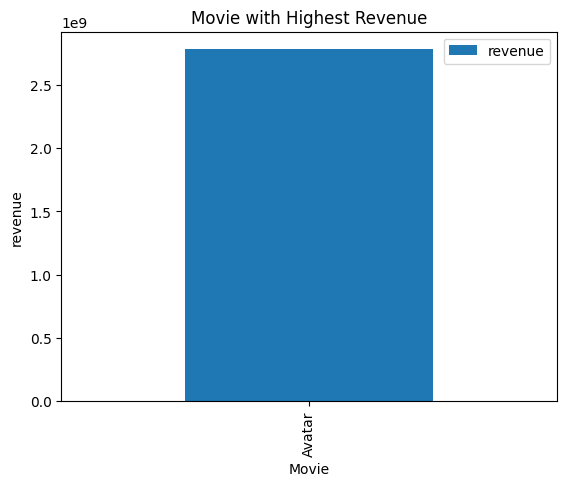

In [14]:
Tmdb_moveis=pd.read_csv('Tmdb-movies.csv')#it is necessary for the second line
highest_revenue_index = Tmdb_moveis['revenue'].idxmax()
highest_revenue_movie = Tmdb_moveis.loc[highest_revenue_index, 'original_title']
highest_revenue_value = Tmdb_moveis.loc[highest_revenue_index, 'revenue']

Tmdb_moveis = pd.DataFrame({'Movie': [highest_revenue_movie], 'revenue': [highest_revenue_value]})
#Tmdb_moveis.plot(x='Movie', y='Revenue', kind='bar', xlabel='Movie', ylabel='Revenue', title='Movie with Highest Revenue')
plot_bar_scatter(Tmdb_moveis,'Movie','revenue','Movie with Highest Revenue','bar')


##### we figure out that the movie with highest revenue is Avatar

#### Is the revenue always higher than the budget?

In [15]:
Tmdb_moveis=pd.read_csv('Tmdb-movies.csv')#it is necessary for the second line
Tmdb_moveis['revenue']> Tmdb_moveis['budget'].any()

0         True
1         True
2         True
3         True
4         True
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Name: revenue, Length: 10866, dtype: bool

##### we figure out from the code that not all the revenues is higher than the budget 

#### Does runtime differs in revenue?

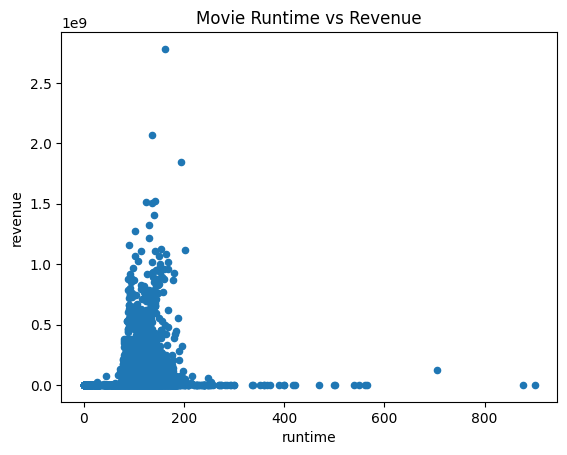

In [16]:
#Tmdb_moveis.plot(x='runtime', y='revenue', kind='scatter', xlabel='Runtime', ylabel='Revenue', title='Movie Runtime vs Revenue').legend
plot_bar_scatter(Tmdb_moveis,'runtime','revenue','Movie Runtime vs Revenue','scatter')


#### the movies that its runtime between 0 and 200 have the highest revenue

#### who is the director responsible for making a movie have high revenue?


In [17]:
highest_revenue_director = Tmdb_moveis.groupby('director')['revenue'].sum().idxmax()
highest_revenue_director

'Steven Spielberg'

#### What kinds of properties are associated with movies that have high revenues?

In [18]:
revenue_threshold = Tmdb_moveis['revenue'].quantile(0.75)
high_revenue_movies = Tmdb_moveis[Tmdb_moveis['revenue'] > revenue_threshold]
associated_properties = high_revenue_movies[['budget', 'genres', 'release_year','runtime']].drop(10819)
associated_properties

,budget,genres,release_year,runtime
0,150000000,Action|Adventure|Science Fiction|Thriller,2015,124
1,150000000,Action|Adventure|Science Fiction|Thriller,2015,120
2,110000000,Adventure|Science Fiction|Thriller,2015,119
3,200000000,Action|Adventure|Science Fiction|Fantasy,2015,136
4,190000000,Action|Crime|Thriller,2015,137
...,...,...,...,...
10770,2300000,Drama|Crime,1978,121
10771,4000000,Drama|Animation|Adventure,1978,132
10780,3500000,Horror|Thriller|Science Fiction|Mystery,1978,115
10791,6800000,Action|Drama|Horror|Thriller,1978,107


#### properties of associated for a movie to have high revenue is based on year , genre , budget and runtime


<a id='conclusions'></a>
## Conclusions



### based on data analysis, every year have a popular genre and the movie 'Avatar' has the highest revenue. we figured out that higher budget doesn't always mean higher revenue  also movie runtime should be between 0 to 200 so it gets high revenue. the director that most of his movies gets high revenue is 'Steven Spielberg'. to summarize everything properties associated with movies that have high revenue is budget, genre and runtime and that is based on release year and you must use a successful director like 'Steven Spielberg' and in data wrangling the limitation was duplicated values and missing values